In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# The dataset represents a single [but unknown] year customer data for the company "Telco"
# GOAL: determine potential correlations with customer churn 
# and experiment from there

df = pd.read_csv('C:/Users/jafon/Documents/PythonMaterials/Data/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


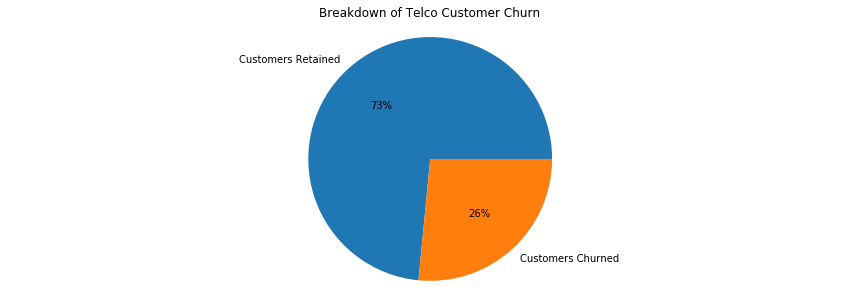

Total Number of Customers Reviewed is 7043.


In [8]:
#via df.Churn.value_counts()
piechurnvalue = [5174, 1869]
piechurnlabels = ['Customers Retained', 'Customers Churned']

plt.figure(figsize=(15,5)) 
plt.pie(piechurnvalue, autopct='%d%%', labels=piechurnlabels)
plt.axis('equal')
plt.title('Breakdown of Telco Customer Churn')
plt.show()
print("Total Number of Customers Reviewed is 7043.")

In [9]:
print(df.gender.value_counts())
print(df.Partner.value_counts())
print(df.Dependents.value_counts())


Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64


In [10]:
genderbool = [1 if ((x == 'Yes') or (x=='Male')) else 0 for x in df.gender]
genderbool[:10]

[0, 1, 1, 1, 0, 0, 1, 0, 0, 1]

In [11]:
df['Genderbool'] = pd.Series(genderbool) #must be in bracket-string format when assigning new column - note to self
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Genderbool
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [12]:
# dropping irrelevant columns, including 'Senior Citizen', which is all 0's

dfabrev = df[['gender', 'Genderbool', 'Partner', 'Dependents', 'Contract', 'MonthlyCharges']].copy()
dfabrev.columns = ['Gender', 'Genderbool', 'Partner', 'Dependents', 'Contract', 'Monthly Charges']
dfabrev.head()

,Gender,Genderbool,Partner,Dependents,Contract,Monthly Charges
0,Female,0,Yes,No,Month-to-month,29.85
1,Male,1,No,No,One year,56.95
2,Male,1,No,No,Month-to-month,53.85
3,Male,1,No,No,One year,42.30
4,Female,0,No,No,Month-to-month,70.70


In [13]:
dfboolvalues = pd.DataFrame([[3555, 3402, 2110, 1869],
                            [3488, 3641, 4933, 5174]])
dfboolvalues.columns = ['Gender (M/F)', 'Partner? (Y/N)', 'Dependents? (Y/N)','Churn? (Y/N)']
dfboolvalues.head()
# Will convert the below values to percentages for a more uniform analysis

,Gender (M/F),Partner? (Y/N),Dependents? (Y/N),Churn? (Y/N)
0,3555,3402,2110,1869
1,3488,3641,4933,5174


In [14]:
# boolean-izing remaining attributes for graphing purposes
dfabrev['Partner'] = pd.Series([1 if (x == 'Yes') else 0 for x in dfabrev['Partner']])

In [15]:

dfabrev['Dependents'] = pd.Series([1 if (x == 'Yes') else 0 for x in dfabrev['Dependents']])

dfabrev['Contract1'] = pd.Series([1 if x == 'Month-to-month' else 
                                  (2 if x == 'One year' else 3) for x in dfabrev['Contract']])

dfabrev.head(4)

,Gender,Genderbool,Partner,Dependents,Contract,Monthly Charges,Contract1
0,Female,0,1,0,Month-to-month,29.85,1
1,Male,1,0,0,One year,56.95,2
2,Male,1,0,0,Month-to-month,53.85,1
3,Male,1,0,0,One year,42.30,2


In [16]:
dfabrev['Churn'] = df.Churn

dfabrev['Churnbool'] = pd.Series([1 if x == 'Yes' else 0 for x in df.Churn])
print(7043-939-930)
print(5174/7043)
dfabrev.head()

5174
0.7346301292063041


,Gender,Genderbool,Partner,Dependents,Contract,Monthly Charges,Contract1,Churn,Churnbool
0,Female,0,1,0,Month-to-month,29.85,1,No,0
1,Male,1,0,0,One year,56.95,2,No,0
2,Male,1,0,0,Month-to-month,53.85,1,Yes,1
3,Male,1,0,0,One year,42.30,2,No,0
4,Female,0,0,0,Month-to-month,70.70,1,Yes,1


In [18]:
# Now I want to see how much churn (y) for different contracts (x) is there with (hue) as gender
# also want to throw in correlogram, maybe do subplots side by side?????

plt.figure(figsize=(27,10))

dfheat = dfabrev[['Genderbool', 'Partner', 'Dependents', 'Contract1', 'Churnbool']].copy()

dfheat = dfheat.reset_index().pivot('Genderbool', 'Contract1', 'Churnbool')

ax = sns.heatmap(data=dfheat)
plt.title('Relative Churn for Contract Subscription Type with Gender')
plt.show()

# https://python-graph-gallery.com/90-heatmaps-with-various-input-format/

ValueError: Index contains duplicate entries, cannot reshape

<Figure size 1944x720 with 0 Axes>

In [19]:
dfabrev['Partnerbool'] = pd.Series([1 if x == 'Yes' else 0 for x in dfabrev.Partner])

In [20]:
dfcontract = pd.DataFrame(data=dfabrev['Contract1'])

In [21]:
# (splitting up contract types for correlation analysis)

dfcontract['Monthly'] = [1 if x == 1 else 0 for x in dfcontract['Contract1']]
dfcontract['Annual'] = [1 if x == 2 else 0 for x in dfcontract['Contract1']]
dfcontract['Bi-annual'] = [1 if x == 3 else 0 for x in dfcontract['Contract1']]
dfcontract

,Contract1,Monthly,Annual,Bi-annual
0,1,1,0,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0
5,1,1,0,0
6,1,1,0,0
7,1,1,0,0
8,1,1,0,0
9,2,0,1,0


In [22]:
# creating correlation analysis dataframe

dfheat1 = dfabrev[['Genderbool', 'Partnerbool', 'Dependents', 'Churnbool']].copy()
dfheat2 = dfcontract[['Monthly', 'Annual', 'Bi-annual']].copy()
dfheat2.columns=['Monthly Contract','Annual Contract', 'Bi-annual Contract']
#dfheat = pd.merge(dfheat1, dfheat2, left_on='Dependents', right_on='Monthly')
#dfheat.head()

In [23]:
# merging the two partial corr analysis dataframes - rearranging columns to have Churnbool at end

dfheat = dfheat1.join(dfheat2)
dfheat = dfheat[['Genderbool', 'Partnerbool', 'Dependents', 
                 'Monthly Contract','Annual Contract', 'Bi-annual Contract', 'Churnbool']]
dfheat.head()

,Genderbool,Partnerbool,Dependents,Monthly Contract,Annual Contract,Bi-annual Contract,Churnbool
0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1
3,1,0,0,0,1,0,0
4,0,0,0,1,0,0,1


                    Genderbool  Partnerbool  Dependents  Monthly Contract  \
Genderbool            1.000000          NaN    0.010517         -0.003386   
Partnerbool                NaN          NaN         NaN               NaN   
Dependents            0.010517          NaN    1.000000         -0.231720   
Monthly Contract     -0.003386          NaN   -0.231720          1.000000   
Annual Contract       0.008026          NaN    0.068368         -0.568744   
Bi-annual Contract   -0.003695          NaN    0.204613         -0.622633   
Churnbool            -0.008612          NaN   -0.164221          0.405103   

                    Annual Contract  Bi-annual Contract  Churnbool  
Genderbool                 0.008026           -0.003695  -0.008612  
Partnerbool                     NaN                 NaN        NaN  
Dependents                 0.068368            0.204613  -0.164221  
Monthly Contract          -0.568744           -0.622633   0.405103  
Annual Contract            1.000000   

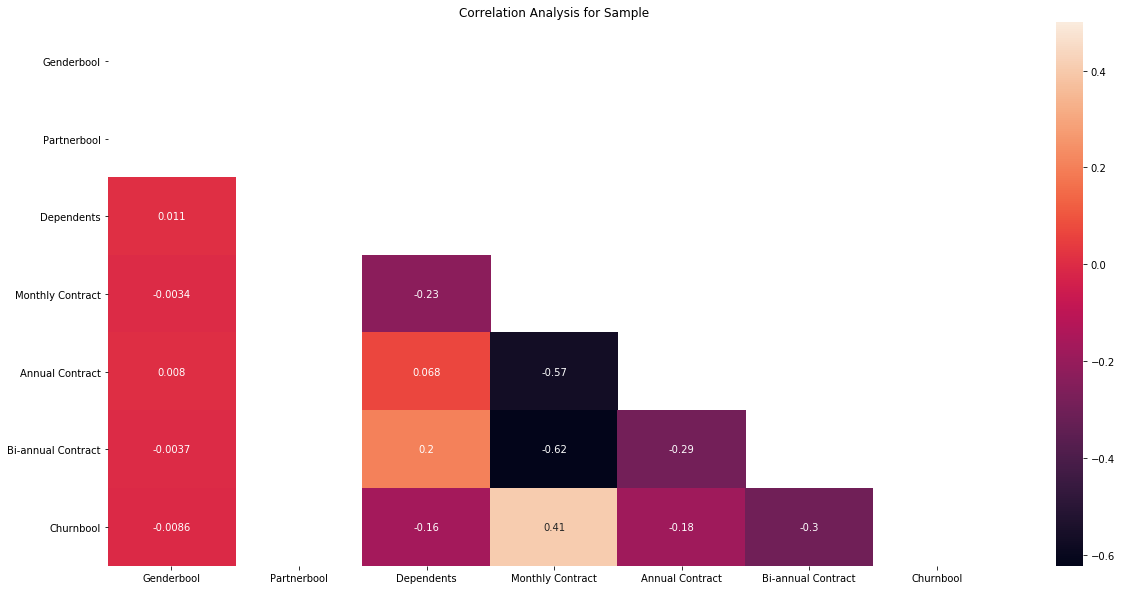

In [24]:
# entering dfheat in for correlation analysis
corr = dfheat.corr()

print(corr)

# Generating a mask for the upper triangle of the correlation heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, mask=mask, vmax=0.5, xticklabels=dfheat.columns, yticklabels=dfheat.columns, annot=True)

plt.title('Correlation Analysis for Sample')

plt.show()


In [25]:
# It appears that out of the whole bottom row, 'Churnbool', Monthly Contract and Churning has a mild correlation (0.41)

# We will keep that in mind as we analyze the fractions of these samples and 
# compare it against the total fraction of those churned (see pie chart above)

In [26]:
# creating new df that analyzed the fractions spoken of (specific definitions found below)

dfgendercheck = dfabrev
dfgendercheck = dfgendercheck.groupby('Gender')['Churnbool'].sum().reset_index()

# below: Churnbool / TotalChurnCount
dfgendercheck['Fraction of Total Churned (%)'] = [x/1869*100 for x in dfgendercheck.Churnbool]

# total counts and fractional demographic
# dfgendercheck['Total Count'] = [3488, 3555] --------- take out raw numbers
dfgendercheck['Fraction of Total Persons (%)'] = [x/7043*100 for x in dfabrev.Gender.value_counts()]

# out of all females, how many churned, out of all males, how many churned
dfgendercheck['Per Capita Fraction of Churn (%)'] = [930/3555*100, 939/3488*100]

dfgendercheck = dfgendercheck[['Gender', 'Per Capita Fraction of Churn (%)', 'Fraction of Total Churned (%)', 
                              'Fraction of Total Persons (%)']]

dfgendercheck.columns = ['Gender', '% Total Churned', '% Makeup of All Churned', '% of Total Persons']

In [27]:
dfgendercheck= dfgendercheck[['Gender', '% of Total Persons', '% Makeup of All Churned', '% Total Churned']]
dfgendercheck.rename(columns={'% Makeup of All Churned': '% Makeup of Churned',
                              '% Total Churned': '% Churned Per Capita'}, inplace=True)

# I finally did it. So:
# % of Total Persons = demographical makeup of the sample (7043 people in total)
# % Makeup of Churned = Out of those churned (1869 people), the demographical makeup
# % Churned vs. Total = raw number of churned / total values within the index category


In [28]:
dfpartnercheck = dfabrev
dfpartnercheck = dfpartnercheck.groupby('Partner')['Churnbool'].sum().reset_index()

dfpartnercheck['Fraction of Total Churned (%)'] = [x/1869*100 for x in dfpartnercheck.Churnbool]

dfpartnercheck['Fraction of Total Persons (%)'] = [x/7043*100 for x in dfabrev.Partner.value_counts()]


dfpartnercheck['Per Capita Fraction of Churn (%)'] = [1200/3641*100, 699/3402*100]


dfpartnercheck = dfpartnercheck[['Partner', 'Per Capita Fraction of Churn (%)', 'Fraction of Total Churned (%)', 
                              'Fraction of Total Persons (%)']]

dfpartnercheck.columns = ['Partner', '% Total Churned', '% Makeup of All Churned', '% of Total Persons']


In [29]:
dfpartnercheck= dfpartnercheck[['Partner', '% of Total Persons', '% Makeup of All Churned', '% Total Churned']]
dfpartnercheck.rename(columns={'% Makeup of All Churned': '% Makeup of Churned',
                              '% Total Churned': '% Churned Per Capita'}, inplace=True)
dfpartnercheck

,Partner,% of Total Persons,% Makeup of Churned,% Churned Per Capita
0,0,51.69672,64.205457,32.957979
1,1,48.30328,35.794543,20.546737


In [30]:
dfpartnercheck['Partner'] = ['No Partner', 'Yes Partner'] # preparing the values for appending to one giant dataframe

In [31]:
dfcontractcheck = dfabrev
dfcontractcheck = dfcontractcheck.groupby('Contract').Churnbool.sum().reset_index()

dfcontractcheck['% of Total Persons'] = [x/7043*100 for x in df.Contract.value_counts()]
dfcontractcheck['% of Makeup Churned'] = [x/1869*100 for x in dfcontractcheck.Churnbool]
dfcontractcheck['% Churned vs. Total'] = [1655/3875*100, 166/1695*100, 48/1473*100]


In [32]:
dfcontractcheck = dfcontractcheck[['Contract', '% of Total Persons', '% of Makeup Churned', '% Churned vs. Total']]

# The values got flipped when sending it to a new dataframe - I checked with .value_counts()
dfcontractcheck['Contract'] = ['Month-to-month Contract', 'Two year Contract', 'One year Contract']

In [33]:
dfdependentscheck = dfabrev
dfdependentscheck = dfdependentscheck.groupby('Dependents').Churnbool.sum().reset_index()

dfdependentscheck['% of Total Persons'] = [x/7043*100 for x in df.Dependents.value_counts()]
dfdependentscheck['% of Makeup Churned'] = [x/1869*100 for x in dfdependentscheck.Churnbool]
dfdependentscheck['% Churned vs. Total'] = [1543/4933*100, 326/2110*100]

In [34]:
dfdependentscheck['Dependents'] = ['No', 'Yes']
dfdependentscheck = dfdependentscheck[['Dependents', '% of Total Persons', '% of Makeup Churned', '% Churned vs. Total']]

In [35]:
dfdependentscheck['Dependents'] = ['No Dependents', 'Yes Dependents']

In [36]:
# preparing for the ultimate concatenation. Behold!

dfgendercheck.rename(columns={'Gender':'Variable Type'}, inplace=True)

dfdependentscheck.rename(columns={'Dependents':'Variable Type'}, inplace=True)

dfpartnercheck.rename(columns={'Partner':'Variable Type'}, inplace=True)

dfcontractcheck.rename(columns={'Contract':'Variable Type'}, inplace=True)



In [37]:
dfgendercheck
dfgendercheck.rename(columns={'% of Makeup of All Churned':'% of Makeup Churned',
                             '% Total Churned':'% Churned vs. Total'}, inplace=True)


In [38]:
dfgendercheck.rename(columns={'% of Makeup of All Churned':'% of Makeup Churned'}, inplace=True)

In [39]:
# The above did not work...there is no god
dfgendercheck.columns=['Variable Type', '% Churned vs. Total', '% of Makeup Churned', '% of Total Persons']

In [40]:
dfpartnercheck.columns = ['Variable Type', '% of Total Persons', '% of Makeup Churned', '% Churned vs. Total']

In [41]:
# now that the column names are standardized, time to append
dftotalanalysis = dfgendercheck.append(dfpartnercheck, ignore_index=True)
dftotalanalysis = dftotalanalysis.append(dfdependentscheck, ignore_index=True)
dftotalanalysis = dftotalanalysis.append(dfcontractcheck, ignore_index=True)

dftotalanalysis

C:\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,% Churned vs. Total,% of Makeup Churned,% of Total Persons,Variable Type
0,50.475650,50.240770,26.160338,Female
1,49.524350,49.759230,26.920872,Male
2,32.957979,64.205457,51.696720,No Partner
3,20.546737,35.794543,48.303280,Yes Partner
4,31.279140,82.557517,70.041176,No Dependents
5,15.450237,17.442483,29.958824,Yes Dependents
6,42.709677,88.550027,55.019168,Month-to-month Contract
7,9.793510,8.881755,24.066449,Two year Contract
8,3.258656,2.568218,20.914383,One year Contract


In [42]:
Churnmakeupremainder = [(100 - x) for x in dftotalanalysis['% of Makeup Churned']]
Personremainder = [(100 - x) for x in dftotalanalysis['% of Total Persons']] 

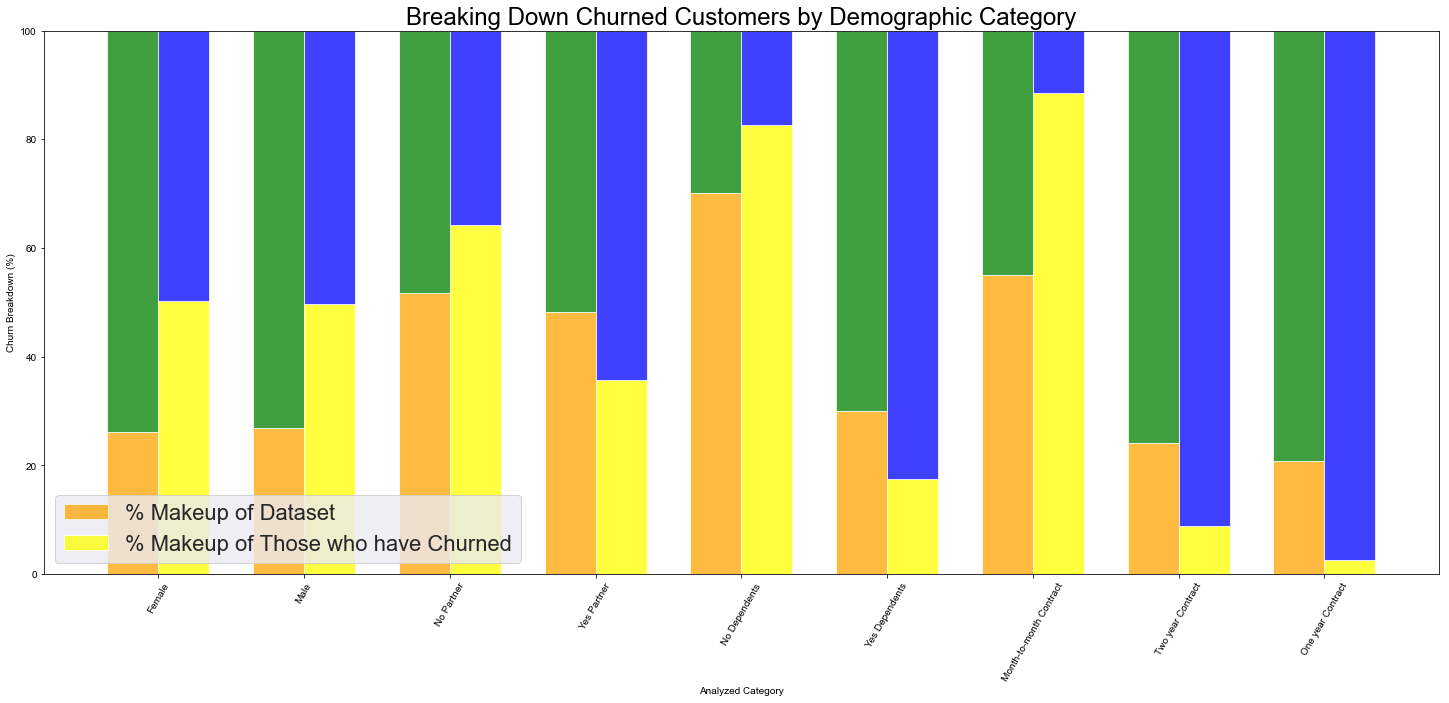

In [43]:
N = 9

fig, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=2)

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, dftotalanalysis['% of Total Persons'], width, color='orange', alpha=0.75)
p2 = ax.bar(ind, Personremainder, width, bottom=dftotalanalysis['% of Total Persons'], color='green', alpha=0.75)

p3 = ax.bar(ind + width, dftotalanalysis['% of Makeup Churned'], width, color='yellow', alpha=0.75)
p4 = ax.bar(ind + width, Churnmakeupremainder, width, bottom=dftotalanalysis['% of Makeup Churned'],  color='blue', alpha=0.75)

ax.set_title("Breaking Down Churned Customers by Demographic Category")
ax.set_xticks(ind + width / 2)

barnames = ['Female', 'Male', 'No Partner', 'Yes Partner', 'No Dependents',
            'Yes Dependents', 'Month-to-month Contract', 'Two year Contract', 'One year Contract']
ax.set_xticklabels(barnames, rotation=60)

ax.legend((p1[0], p3[0]), ('% Makeup of Dataset', '% Makeup of Those who have Churned'), loc='lower left')

ax.autoscale_view()
ax.set(xlabel='Analyzed Category', ylabel='Churn Breakdown (%)', ylim=(0,100))

plt.show()

In [44]:
# one final bar graph for % churn v total

dftotalanalysischurn = dftotalanalysis.sort_values(by=['% Churned vs. Total'])

In [45]:
y_pos = np.arange(len(dftotalanalysischurn['Variable Type']))

height = dftotalanalysischurn['% Churned vs. Total']

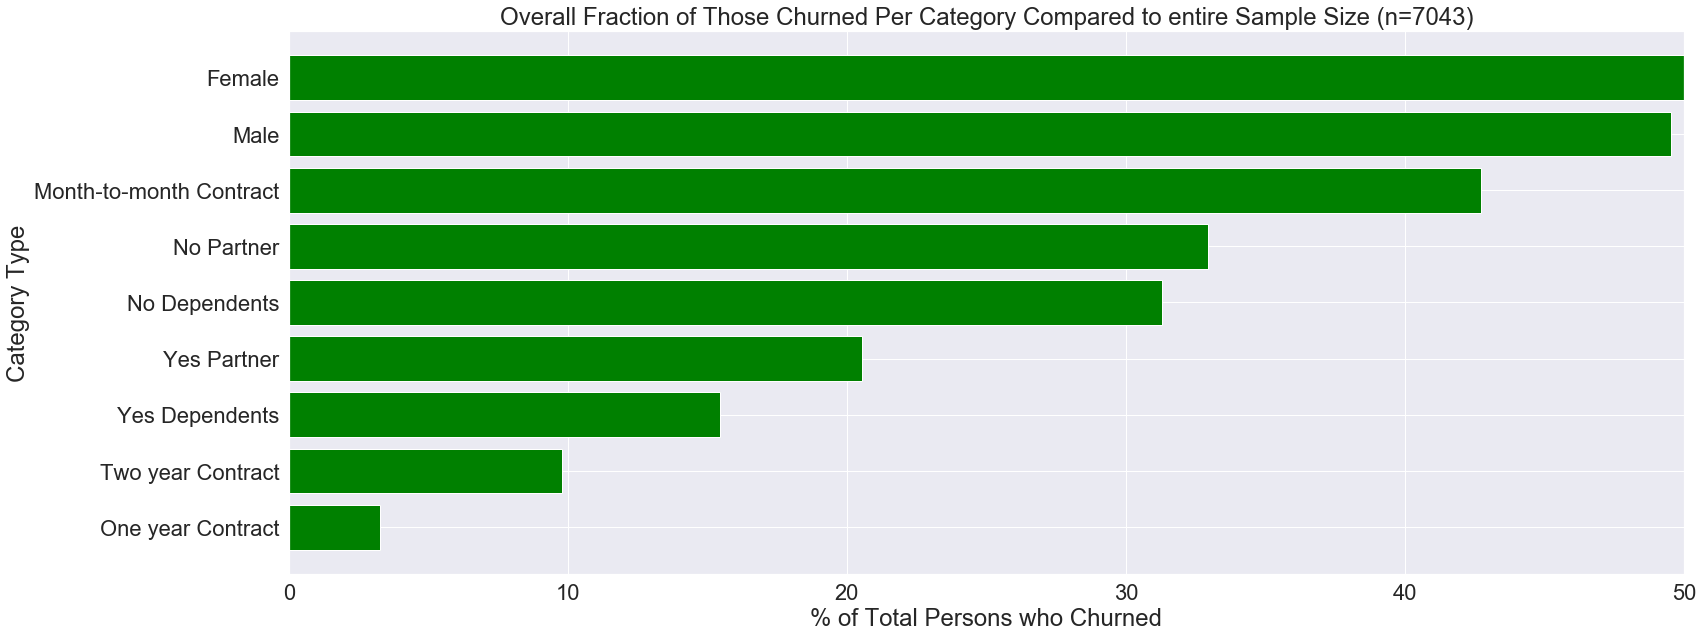

In [46]:
plt.figure(figsize=(25,10))

plt.barh(y_pos, height, color='green')
plt.title('Overall Fraction of Those Churned Per Category Compared to entire Sample Size (n=7043)')

plt.yticks(y_pos, dftotalanalysischurn['Variable Type'])

plt.xlim(0,50)
plt.xlabel('% of Total Persons who Churned')
plt.ylabel('Category Type')

ax.autoscale_view()


plt.show()

In [47]:
# Now that we analyzed categories, let's do some numerical analysis for monthly charges
# I don't need to divide one year contracts by 12 or biannuals by 48 because 
# "monthly charges" already a column in the original df

dfchargemedian = dfabrev.groupby('Contract')['Monthly Charges'].median().reset_index()
dfchargemedian.columns = ('Contract', 'Median Monthly Charge')

dfchargemean = dfabrev.groupby('Contract')['Monthly Charges'].mean().reset_index()
dfchargemean.columns = ('Contract', 'Average Monthly Charge')

dfchargestd = dfabrev.groupby('Contract')['Monthly Charges'].std().reset_index()
dfchargestd.columns = ('Contract', 'Stan. Dev. +/-')

dfchargecheck = pd.merge(dfchargemedian, dfchargemean)
dfchargecheck = pd.merge(dfchargecheck, dfchargestd)
dfchargecheck

,Contract,Median Monthly Charge,Average Monthly Charge,Stan. Dev. +/-
0,Month-to-month,73.25,66.398490,26.926599
1,One year,68.75,65.048608,31.840539
2,Two year,64.35,60.770413,34.678865


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


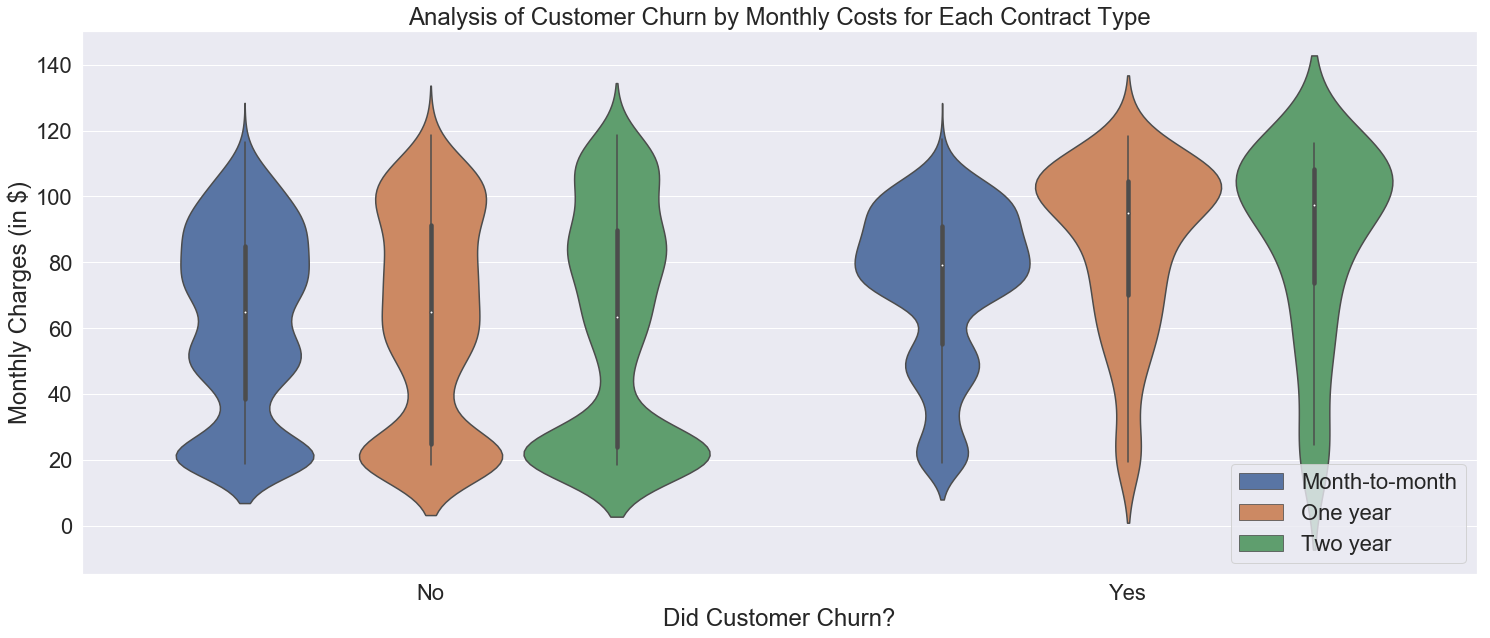

In [48]:
# graphing the above via violin plots

dfviolin = dfabrev[['Contract', 'Monthly Charges', 'Churnbool']].copy()

plt.figure(figsize=(25,10))

ax = sns.violinplot(data=dfviolin, x='Churnbool', y='Monthly Charges', hue='Contract')

plt.xlabel('Did Customer Churn?')
ax.set_xticklabels(['No', 'Yes'])
plt.ylabel('Monthly Charges (in $)')
plt.title('Analysis of Customer Churn by Monthly Costs for Each Contract Type')

plt.legend(loc='lower right')

plt.show()

This violin graph shows that the average distribution of monthly charges is higher for customers who eventually churned as opposed to those who did not. This is a point that would have to be analyzed in future experiments

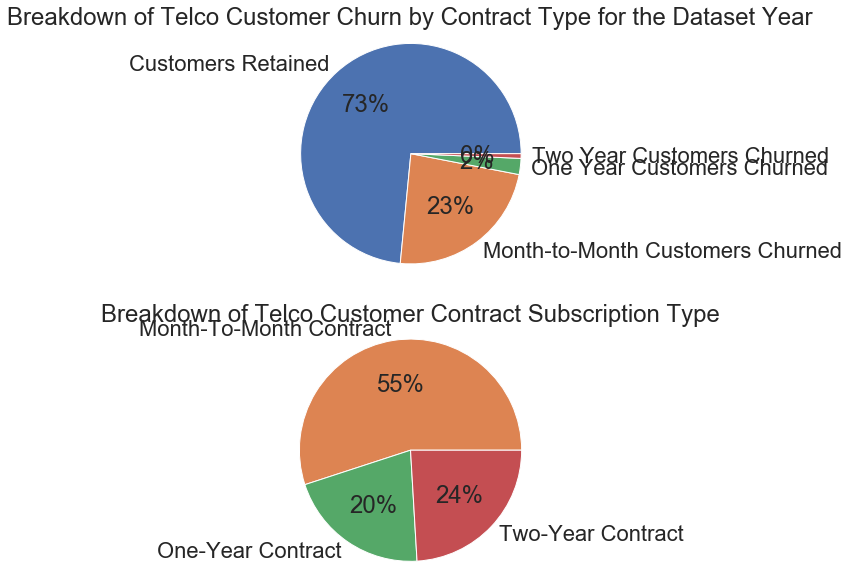

Percentages do not add up to 100 due to rounding.


In [49]:
### Creating pie graph for conclusion

fig, ax = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid((2,1),(0,0))
piechurnvalue = [(7043-1655-166-48), 1655, 166, 48]
piechurnlabels = ['Customers Retained', 'Month-to-Month Customers Churned',
                  'One Year Customers Churned', 'Two Year Customers Churned']

plt.pie(piechurnvalue, autopct='%d%%', labels=piechurnlabels)
plt.axis('equal')
plt.title('Breakdown of Telco Customer Churn by Contract Type for the Dataset Year')

ax2 = plt.subplot2grid((2,1),(1,0))
piechurnvalue2 = [3875,1473,1695] # via dfabrev.Contract.value_counts()
piechurnlabels2 = ['Month-To-Month Contract', 'One-Year Contract', 'Two-Year Contract']

plt.pie(piechurnvalue2, autopct='%d%%', labels=piechurnlabels2, colors=('C1', 'C2', 'C3'))
plt.axis('equal')
plt.title('Breakdown of Telco Customer Contract Subscription Type')
plt.show()


plt.show()


print('Percentages do not add up to 100 due to rounding.')

## Problem: How do we reduce Telco Churn Rate?

According to our data, __over 1 in 4 customers decided to leave Telco this year.__ For a subscriber telecommunications model, maintaining our customer base is crucial to the continuation of the company.

Based on the data provided, over half of customers (~55%) are subscribed to our services via a month-to-month subscription plan. Out of all month-to-month customers, __42.7% month-to-month customers churned this year.^^__ Another alarming statistic is that __89% of customers who churned were on a month-to-month plan.__ Meanwhile, only 8.9% of one-year contract subscribers and 2.6% of two-year contract subscribers churned (amounts add up to over 100% due to rounding).

Based on these data, it is worth testing out ways to increase annual or biannual contract subscriptions. It is hypothesized that longer term subscriptions maintain a vendor-customer relationship to the point that customer loyalty is established. By way of increasing customer loyalty, churn would decrease, and a higher rate of revenue will be maintained year-to-year.

There is also a potential correlation between monthly price of a contract, regardless of contract type, and whether a customer churns. Combining this point with the above goal, it is further hypothesized that customers will be more likely to maintain a longer-term contract if the price is right.

### Goal: Increase One-Year Contract and/or Two-Year Contract Subscriptions

The design of the experiment - to see if reaching this goal decreases the churn rate - is as follows:

From a random selection of _month-to-month customers_, i.e., random distribution of males/females, persons with/without partners, persons with/without dependents, senior citizens/non-senior citizens, etc., create two experimental groups (A, B) plus a third control group (C). Groups A and B will receive a promotional event (via mail, email, etc.) to upgrade their month-to-month plan to a one-year contract or two-year contract, respectively. The promotional event will be a promotional rate for our services for the duration of the contract should they upgrade. The promotional rate shall be the same rate for both groups - to avoid churn for one group over another being attributed to the promotion and not the services themselves. The promotions will have an expiration date of four weeks after the initial mailing; if a person were able to accept a two-year promotion months after the rest of the experimental group accepted, then this would needlessly extend our observations.

Group C will not receive any promotional upgrade event.

Churn rates will be recorded month-to-month, making special notes at the one-year and two-year marks. If, after one year, the churn rates for these experimental groups are at least 15% lower^ than that of the control group, then it can be determined that the length of a contract is a significant factor in customer retention, and experimentation should continue. If, after the second year, churn rates for these experimental groups are still at least 15% lower than that of the control group, promotional event mailings should be sent to the remaining month-to-month customers. Additionally, if the churn rate for Group B is 15% less than the churn rate for Group A (or if Group B's churn rate = 0%), promotional event mailings offering the promotional rate for one-year contracts _and_ an even more attractive subscription rate for two-year contracts should be mailed out instead.
***
^For purposes of analysis in this study - a t-test to determine significance is not needed. Churn rate is a binary variable (i.e., did the customer churn or not), so there is no variability within the Groups, and so no t-test is warranted.

***
### A Point of Bias

^^It is unclear the span of time that this dataset covers. __For purposes of this analysis, a one-year period will be assumed.__ An undeniable bias arises from a one-year dataset. If the dataset reflects a single year of Telco statistics, then it is no surprise that month-to-month churn would be significantly higher than one-year or two-year subscriptions. 

It is presumed that one-year contracts would end sometime within the assumed one-year period of this data; however, it is possible that the end date for at least some two-year contracts (which make up approximately 24.1% of all customers) does not fall within the period of time that the data reflect, and so there would be no opportunity for a customer to decide whether to continue with Telco services. Nevertheless, again assuming that this dataset reflects a one-year period, this inherent bias should not be much of a concern for the remaining 75.9% of customers observed. 

Overall, one possible remedy for the above class imbalance is to standardize the expected churn values for the three contract types. To do this, for example, we would set baseline benchmarks as expected churn values, such as month-to-month customers being 80% more likely to churn than one year customers and 90% more than two-year. We would then apply the 1.8x and 1.9x values to create a proportionate uniform churn value. That bias adjustment is not done here but should be seriously considered in future experiements.
***

